In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
infectedDf = pd.read_csv('./covid_dataset/time_series_covid19_confirmed_global.csv')
recoveredDf = pd.read_csv('./covid_dataset/time_series_covid19_recovered_global.csv')
deathDf = pd.read_csv('./covid_dataset/time_series_covid19_deaths_global.csv')

In [3]:
infectedDf[infectedDf['Country/Region']=='Indonesia']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22
149,NaN,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,6366518,6369778,6372542,6374882,6378489,6382002,6385140,6387944,6390553,6392492


In [4]:
infected = infectedDf.groupby('Country/Region').sum()
recovered = recoveredDf.groupby('Country/Region').sum()
death = deathDf.groupby('Country/Region').sum()

infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
death.drop(columns=['Lat','Long'],inplace=True)

recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/2/22,9/3/22,9/4/22,9/5/22,9/6/22,9/7/22,9/8/22,9/9/22,9/10/22,9/11/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

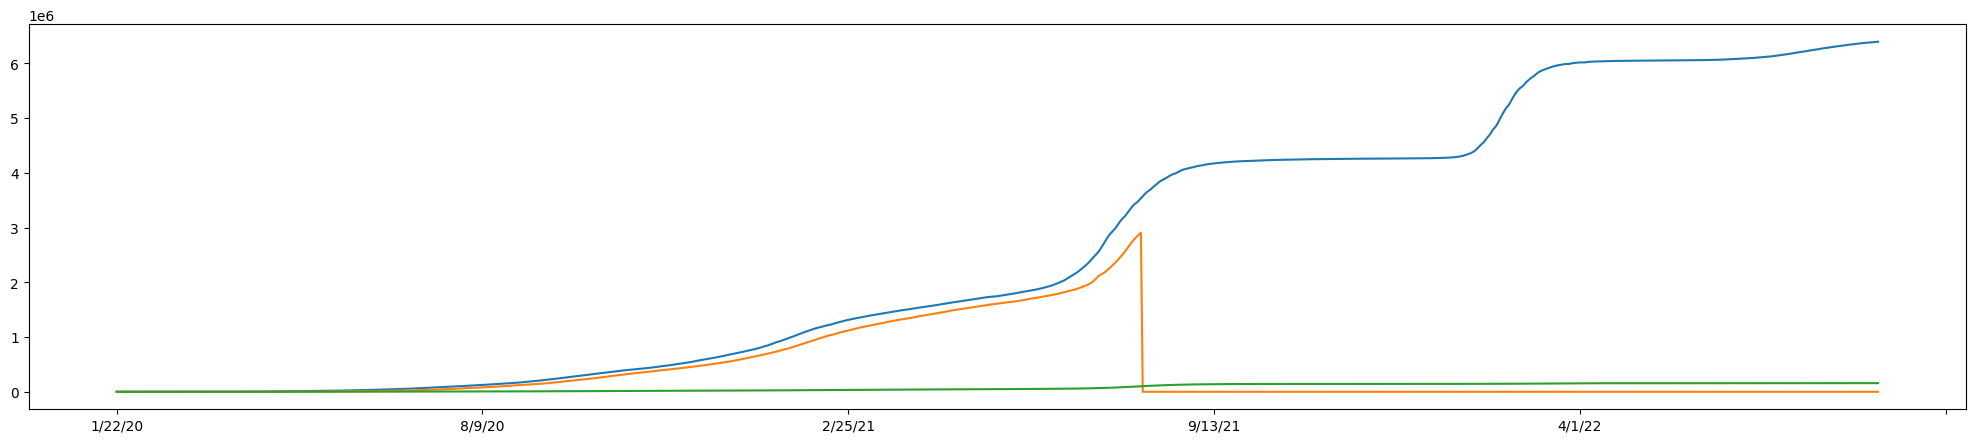

In [5]:
plt.figure(figsize=(25,5))

infected.loc['Indonesia'].plot()
recovered.loc['Indonesia'].plot()
death.loc['Indonesia'].plot()

In [6]:
# func to create df summary of recovered, infected, death of certain country
def summaryDf(country):
    df = pd.DataFrame({
		'infected': infected.loc[country],
		'recovered': recovered.loc[country],
		'death': death.loc[country],
	})
    df.index = pd.to_datetime(df.index)
    plt.figure(figsize=(25,5))
    return df

In [7]:
df = summaryDf('Indonesia')
df

,infected,recovered,death
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2022-09-07,6382002,0,157717
2022-09-08,6385140,0,157729
2022-09-09,6387944,0,157741
2022-09-10,6390553,0,157757


<Figure size 2500x500 with 0 Axes>

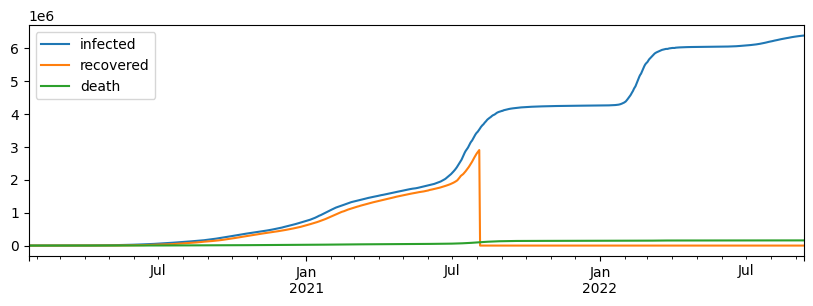

In [8]:
df.plot(figsize=(10,3))
plt.show()

<AxesSubplot:>

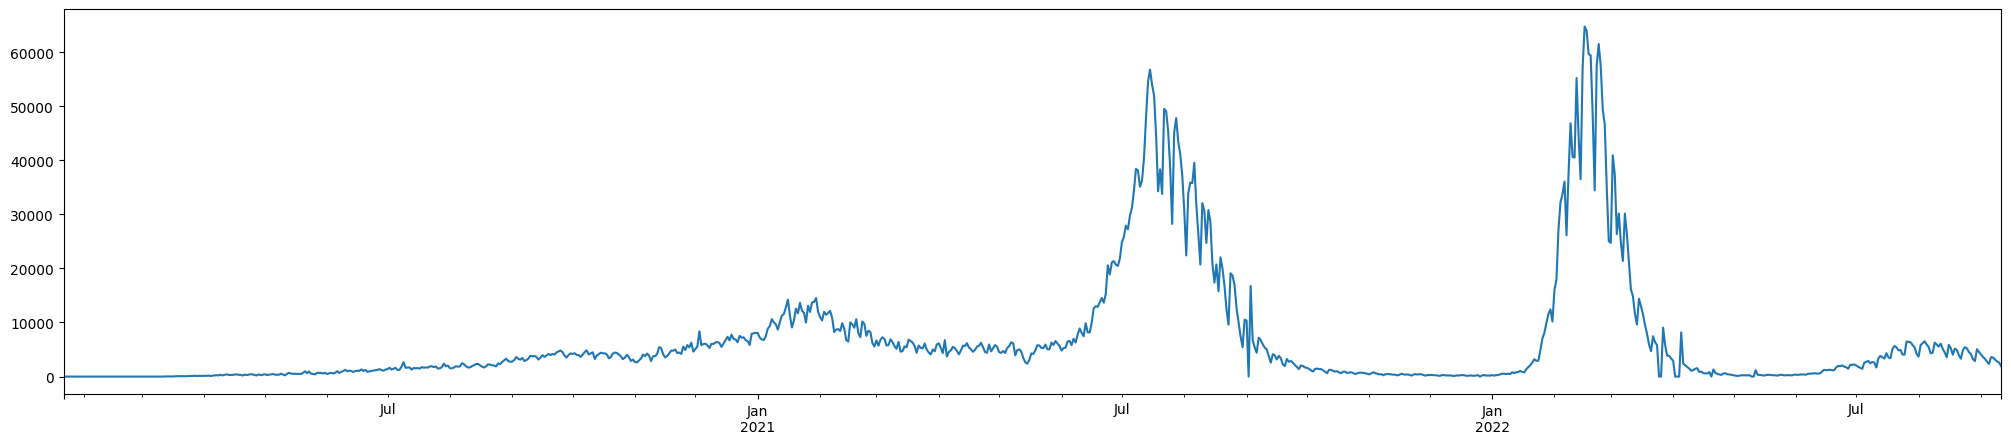

In [9]:
plt.figure(figsize=(25,5))
df['infectedDiff'] = df['infected'].diff()
df['infectedDiff'].plot()

In [10]:
df

,infected,recovered,death,infectedDiff
2020-01-22,0,0,0,NaN
2020-01-23,0,0,0,0.0
2020-01-24,0,0,0,0.0
2020-01-25,0,0,0,0.0
2020-01-26,0,0,0,0.0
...,...,...,...,...
2022-09-07,6382002,0,157717,3513.0
2022-09-08,6385140,0,157729,3138.0
2022-09-09,6387944,0,157741,2804.0
2022-09-10,6390553,0,157757,2609.0


<AxesSubplot:>

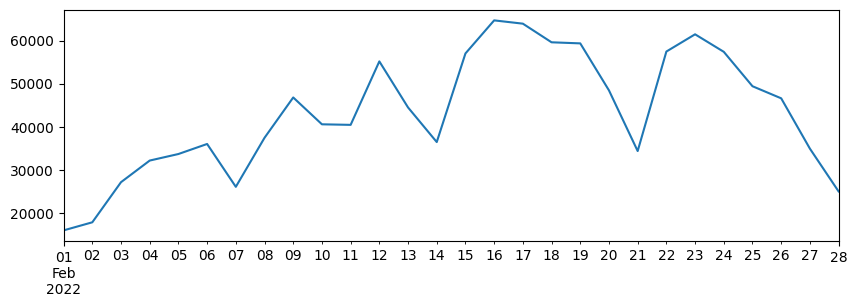

In [11]:
df[
	(df.index.year == 2022) & (df.index.month == 2)
]['infectedDiff'].plot(figsize=(10,3))

In [12]:
df['avgInfectedDiff'] = df['infectedDiff'].rolling(window=7).mean()
df

,infected,recovered,death,infectedDiff,avgInfectedDiff
2020-01-22,0,0,0,NaN,NaN
2020-01-23,0,0,0,0.0,NaN
2020-01-24,0,0,0,0.0,NaN
2020-01-25,0,0,0,0.0,NaN
2020-01-26,0,0,0,0.0,NaN
...,...,...,...,...,...
2022-09-07,6382002,0,157717,3513.0,3313.428571
2022-09-08,6385140,0,157729,3138.0,3176.857143
2022-09-09,6387944,0,157741,2804.0,3060.857143
2022-09-10,6390553,0,157757,2609.0,2967.857143


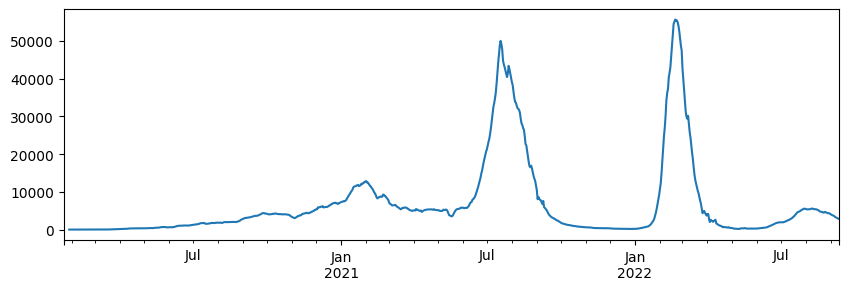

In [13]:
df['avgInfectedDiff'].plot(figsize=(10,3))
plt.show()

In [14]:
# compare several countries and see the population then compare the % of infected to population of a country

countries = pd.read_csv('./covid_dataset/UID_ISO_FIPS_LookUp_Table.csv')
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4312,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4313,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4314,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4315,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [15]:
# get the population by selecting country that the province is NaN

countries[(countries['Country_Region']=='Indonesia') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
236,360,ID,IDN,360.0,NaN,NaN,NaN,Indonesia,-0.7893,113.9213,Indonesia,273523621.0


In [16]:
# get only the population and calculate it
population = countries[(countries['Country_Region']=='Indonesia') & countries['Province_State'].isna()]['Population'].iloc[0]
population

273523621.0

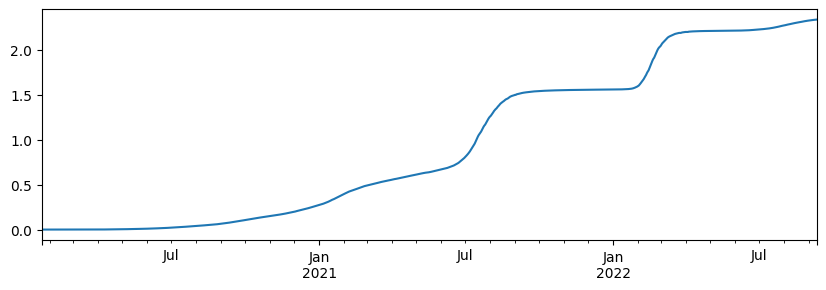

In [17]:
# plot the infected population from time to time on certain country

df['infectedPopulation'] = df['infected']*100/population
df['infectedPopulation'].plot(figsize=(10,3))
plt.show()

In [18]:
df

,infected,recovered,death,infectedDiff,avgInfectedDiff,infectedPopulation
2020-01-22,0,0,0,NaN,NaN,0.000000
2020-01-23,0,0,0,0.0,NaN,0.000000
2020-01-24,0,0,0,0.0,NaN,0.000000
2020-01-25,0,0,0,0.0,NaN,0.000000
2020-01-26,0,0,0,0.0,NaN,0.000000
...,...,...,...,...,...,...
2022-09-07,6382002,0,157717,3513.0,3313.428571,2.333254
2022-09-08,6385140,0,157729,3138.0,3176.857143,2.334402
2022-09-09,6387944,0,157741,2804.0,3060.857143,2.335427
2022-09-10,6390553,0,157757,2609.0,2967.857143,2.336381
